## Метод опорных векторов

В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя **классификацию с мягким зазором** и параметром C.

В [предложенном архиве](https://drive.google.com/open?id=1HLJErnl0u_yiyrXykyq279DVuYMlQldW) находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат: `cat/dog.номер_изображения.jpg`в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.

[Следующая выборка](https://courses.openedu.ru/assets/courseware/v1/c8f3e99cf88c0643abc7ab918beded9c/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/test_task.zip) предназначена для классификации новых объектов после построения классификатора.

Для работы с изображениями и получения их [гистограмм](https://ru.wikipedia.org/wiki/Гистограмма_(фотография)) — характеристик распределения интенсивности изображения, следует воспользоваться следующей функцией и библиотекой `cv2`:

```python
import cv2

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()
```

Для чтения изображений также воспользуйтесь библиотекой `cv2`: `cv2.imread()`

В задачах используйте реализацию метода опорных векторов [из библиотеки sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html):

```python
from sklearn.svm import LinearSVC
```

При считывании набора данных (картинок) из папки для построения гистограммы отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):

```python
imagePaths = sorted(list(paths.list_images('path')))
```

Котов закодируйте нулями, а собак — единицей.

## Задание 1

Обучите классификатор `LinearSVC()` при `C = 0.72` и `random_state = 5` на предложенной выборке. Используйте параметр `random_state = 5` для разделения выборки на тренировочную и тестовую части, в отношении `75/25` функции `train_test_split()`.

In [52]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [53]:
!ls

drive  sample_data


In [73]:
from imutils import paths
import cv2
import matplotlib.pyplot as plt

project_folder = '/content/drive/MyDrive/ITMO/adv-ml/tasks/task_2_svm/'

train_imgs_paths = sorted(list(paths.list_images(project_folder + 'train_task/train')))
train_imgs = [cv2.imread(path) for path in train_imgs_paths]

In [74]:
test_imgs_paths = sorted(list(paths.list_images(project_folder + 'test_task/test')))
test_imgs = [cv2.imread(path) for path in test_imgs_paths]

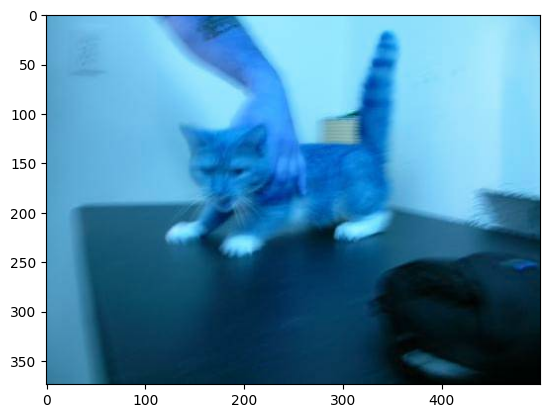

In [98]:
plt.imshow(train_imgs[0])

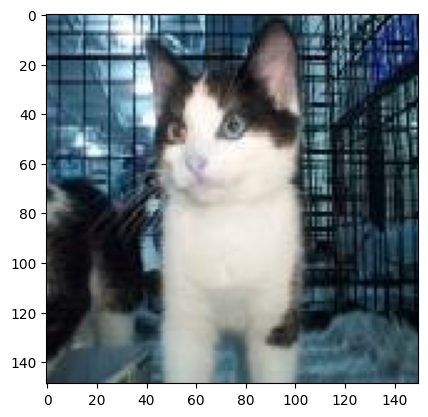

In [76]:
plt.imshow(test_imgs[0])

In [77]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [108]:
import pandas as pd

df_train = pd.DataFrame(data=[extract_histogram(img) for img in train_imgs])
df_train["class"] = [0 if i < 500 else 1 for i in range(1000)]
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.242645,0.073122,0.000232,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.087363,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0
1,0.418818,0.126781,0.000085,0.000000,0.000000,0.0,0.0,0.0,0.005085,0.076441,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000042,0.000000,0
2,0.356737,0.184168,0.020616,0.001619,0.000717,0.0,0.0,0.0,0.000041,0.027440,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.007726,0
3,0.001266,0.019995,0.011941,0.001583,0.000158,0.0,0.0,0.0,0.000000,0.002145,...,0.002233,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.023354,0.497077,0
4,0.000000,0.000105,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000366,...,0.000000,0.0,0.002719,0.7748,0.34338,0.038583,0.114442,0.126833,0.008469,0


In [109]:
df_test = pd.DataFrame(data=[extract_histogram(img) for img in test_imgs])
df_test["class"] = [0 if i < 50 else 1 for i in range(100)]
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.567117,0.194313,0.009939,0.000406,0.0,0.0,0.0,0.0,0.001014,0.261450,...,0.000811,0.0,0.0,0.0,0.0,0.0,0.0,0.154963,0.218247,0
1,0.013429,0.020131,0.021416,0.000176,0.0,0.0,0.0,0.0,0.012976,0.030814,...,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.000025,0.000000,0
2,0.305423,0.080943,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003492,0.090926,...,0.001008,0.0,0.0,0.0,0.0,0.0,0.0,0.000258,0.024489,0
3,0.399897,0.002392,0.000000,0.000000,0.0,0.0,0.0,0.0,0.110738,0.052461,...,0.000272,0.0,0.0,0.0,0.0,0.0,0.0,0.010275,0.214028,0
4,0.693011,0.144219,0.003652,0.000306,0.0,0.0,0.0,0.0,0.002686,0.131873,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000024,0.024763,0


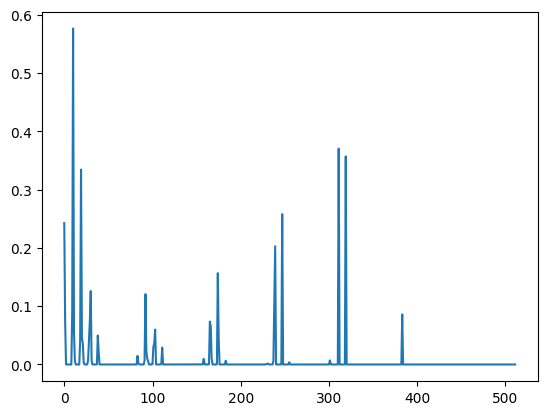

In [110]:
plt.plot(df_train.iloc[0][:-1])

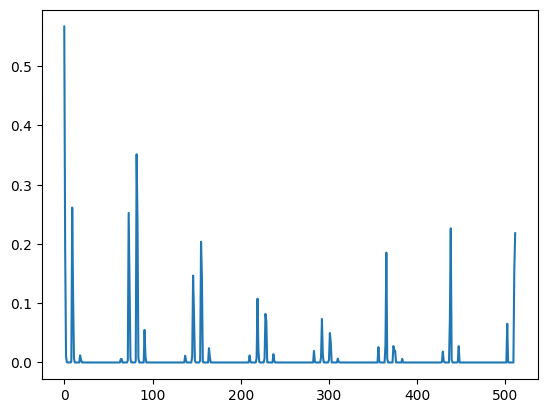

In [106]:
plt.plot(df_test.iloc[0][:-1])

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train[df_train.columns[:-1]], df_train["class"], test_size = 0.25, random_state=5)

In [118]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.72, random_state=5)
svm.fit(X_train, y_train)

print("train accuracy:", svm.score(X_train, y_train))
print("test accuracy:", svm.score(X_test, y_test))

train accuracy: 0.7106666666666667
test accuracy: 0.556


Введите значение коэффициента $\theta_{449}$, $\theta_{242}$, $\theta_{76}$ построенной гиперплоскости

In [126]:
print([round(svm.coef_[0][i], 2) for i in [448, 241, 75]])

[0.0, 0.0, 0.36]


Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите среднее значение метрик $F_1$ (Macro-F1):

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm.predict(X_test))

array([[80, 35],
       [76, 59]])

In [143]:
from sklearn.metrics import f1_score

round(f1_score(y_test, svm.predict(X_test), average='macro'), 2)

0.55

Выполните предсказание для изображений:
* cat.1046.jpg
* dog.1016.jpg
* cat.1028.jpg
* cat.1032.jpg

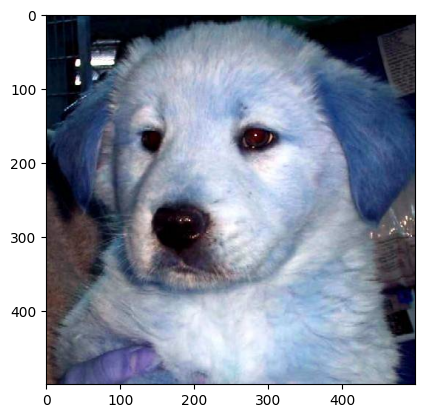

In [144]:
plt.imshow(test_imgs[66])

In [146]:
svm.predict(df_test.iloc[[28, 32, 46, 66]].drop(columns=['class']))

array([0, 0, 1, 0])

In [147]:
drive.flush_and_unmount()